In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_excel("Default.xlsx")
print("Rows,Columns:",df.shape)

Rows,Columns: (10000, 4)


In [35]:
df["default"] = df["default"].astype('category')
df["target"] = df["default"].cat.codes

In [75]:
df["student"] = df["student"].astype('category')
df["student_cat"] = df["student"].cat.codes

In [76]:
df

,default,student,balance,income,target,balance_bins,income_bins,student_cat
1,No,No,729.526495,44361.625074,0,"(500.0, 1000.0]","(40000.0, 50000.0]",0
2,No,Yes,817.180407,12106.134700,0,"(500.0, 1000.0]","(10000.0, 20000.0]",1
3,No,No,1073.549164,31767.138947,0,"(1000.0, 1500.0]","(30000.0, 40000.0]",0
4,No,No,529.250605,35704.493935,0,"(500.0, 1000.0]","(30000.0, 40000.0]",0
5,No,No,785.655883,38463.495879,0,"(500.0, 1000.0]","(30000.0, 40000.0]",0
6,No,Yes,919.588530,7491.558572,0,"(500.0, 1000.0]","(-0.001, 10000.0]",1
7,No,No,825.513331,24905.226578,0,"(500.0, 1000.0]","(20000.0, 30000.0]",0
8,No,Yes,808.667504,17600.451344,0,"(500.0, 1000.0]","(10000.0, 20000.0]",1
9,No,No,1161.057854,37468.529288,0,"(1000.0, 1500.0]","(30000.0, 40000.0]",0
10,No,No,0.000000,29275.268293,0,"(-0.001, 500.0]","(20000.0, 30000.0]",0


In [41]:
x.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [37]:
y = df["target"]
x = df.copy()
x = x.drop(["default","student","target"],axis =1)

In [42]:
balance_bins = pd.cut(df["balance"], bins=[0, 500, 1000, 1500,2000,2500,3000], include_lowest=True)
df["balance_bins"] = balance_bins

In [50]:
df

,default,student,balance,income,target,balance_bins
1,No,No,729.526495,44361.625074,0,"(500.0, 1000.0]"
2,No,Yes,817.180407,12106.134700,0,"(500.0, 1000.0]"
3,No,No,1073.549164,31767.138947,0,"(1000.0, 1500.0]"
4,No,No,529.250605,35704.493935,0,"(500.0, 1000.0]"
5,No,No,785.655883,38463.495879,0,"(500.0, 1000.0]"
6,No,Yes,919.588530,7491.558572,0,"(500.0, 1000.0]"
7,No,No,825.513331,24905.226578,0,"(500.0, 1000.0]"
8,No,Yes,808.667504,17600.451344,0,"(500.0, 1000.0]"
9,No,No,1161.057854,37468.529288,0,"(1000.0, 1500.0]"
10,No,No,0.000000,29275.268293,0,"(-0.001, 500.0]"


In [46]:
y_groupby_balance = df.groupby(['target', 'balance_bins' ])['target'].count()

In [49]:
y_groupby_balance

target  balance_bins    
0       (-0.001, 500.0]     2613
        (500.0, 1000.0]     3749
        (1000.0, 1500.0]    2652
        (1500.0, 2000.0]     628
        (2000.0, 2500.0]      25
1       (500.0, 1000.0]        6
        (1000.0, 1500.0]      69
        (1500.0, 2000.0]     177
        (2000.0, 2500.0]      78
        (2500.0, 3000.0]       3
Name: target, dtype: int64

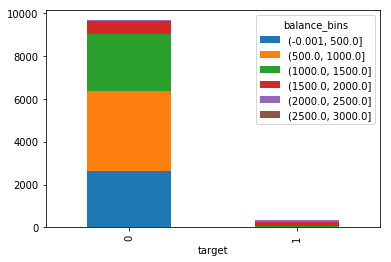

In [47]:
y_groupby_balance.unstack().plot.bar(stacked=True)

In [52]:
income_bins = pd.cut(df["income"], bins=[0, 10000, 20000, 30000,40000,50000,60000,70000,80000], include_lowest=True)
df["income_bins"] = income_bins

In [53]:
y_groupby_income = df.groupby(['target', 'income_bins' ])['target'].count()

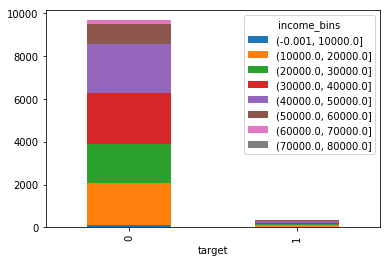

In [54]:
y_groupby_income.unstack().plot.bar(stacked=True)

In [55]:
y_groupby_income

target  income_bins       
0       (-0.001, 10000.0]      109
        (10000.0, 20000.0]    1960
        (20000.0, 30000.0]    1811
        (30000.0, 40000.0]    2395
        (40000.0, 50000.0]    2297
        (50000.0, 60000.0]     941
        (60000.0, 70000.0]     148
        (70000.0, 80000.0]       6
1       (-0.001, 10000.0]        1
        (10000.0, 20000.0]      92
        (20000.0, 30000.0]      65
        (30000.0, 40000.0]      70
        (40000.0, 50000.0]      64
        (50000.0, 60000.0]      36
        (60000.0, 70000.0]       5
Name: target, dtype: int64

In [56]:
df

,default,student,balance,income,target,balance_bins,income_bins
1,No,No,729.526495,44361.625074,0,"(500.0, 1000.0]","(40000.0, 50000.0]"
2,No,Yes,817.180407,12106.134700,0,"(500.0, 1000.0]","(10000.0, 20000.0]"
3,No,No,1073.549164,31767.138947,0,"(1000.0, 1500.0]","(30000.0, 40000.0]"
4,No,No,529.250605,35704.493935,0,"(500.0, 1000.0]","(30000.0, 40000.0]"
5,No,No,785.655883,38463.495879,0,"(500.0, 1000.0]","(30000.0, 40000.0]"
6,No,Yes,919.588530,7491.558572,0,"(500.0, 1000.0]","(-0.001, 10000.0]"
7,No,No,825.513331,24905.226578,0,"(500.0, 1000.0]","(20000.0, 30000.0]"
8,No,Yes,808.667504,17600.451344,0,"(500.0, 1000.0]","(10000.0, 20000.0]"
9,No,No,1161.057854,37468.529288,0,"(1000.0, 1500.0]","(30000.0, 40000.0]"
10,No,No,0.000000,29275.268293,0,"(-0.001, 500.0]","(20000.0, 30000.0]"


In [57]:
# splitting data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [59]:
print(x_train.shape)
print(y_train.shape)

(7500, 2)
(7500,)


In [64]:
Logit = LogisticRegression()

model_logit = Logit.fit(x_train,y_train)

betas = model_logit.coef_

array([[ 0.00040004, -0.00012515]])

In [65]:
predictions_train = model_logit.predict(x_train)
predictions_test = model_logit.predict(x_test)

In [69]:
probabilities_train = model_logit.predict_proba(x_train)

In [70]:
probabilities_train 

array([[9.47835552e-01, 5.21644479e-02],
       [9.75909456e-01, 2.40905443e-02],
       [9.99155141e-01, 8.44859473e-04],
       ...,
       [8.85283713e-01, 1.14716287e-01],
       [9.95139259e-01, 4.86074050e-03],
       [9.98985306e-01, 1.01469376e-03]])

In [72]:
pred_zero_train = probabilities_train 

In [74]:
pred_zero_train

array([0.94783555, 0.05216445])

In [73]:
pred_zero_train

array([0.94783555, 0.05216445])

In [71]:
predictions_train 

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [66]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(y_train,predictions_train)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])

[[7246    2]
 [ 252    0]]

TN = 7246
FN = 2
FP = 252
TP = 0


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predictions_train))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      7248
          1       0.00      0.00      0.00       252

avg / total       0.93      0.97      0.95      7500

